# Has rain gotten more frequent in Seattle?
## Dan Siegel
https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017 
______________

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom
%matplotlib inline 

In [2]:
rain = pd.read_csv('seattleWeather_1948-2017.csv')

In [3]:
rain.describe()
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [47]:
#rain['PRCP'].max()
rain.ix[rain['PRCP'].idxmax()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


DATE    2003-10-20 00:00:00
PRCP                   5.02
TMAX                     65
TMIN                     56
RAIN                   True
YEAR                   2003
Name: 20381, dtype: object

In [4]:
#Bad Values within the data set
rain[pd.isnull(rain).any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [5]:
#Cleaning data set
rain.dropna(axis=1, how='all', inplace=True)

# Hypothesis:
Rain has been steadily increasing in Seattle.
Null Hypothesis: Rain has has not increased or changed over time 

## Describe what the 5 variables mean in the dataset (Chapter 1).
DATE: the date of the observation

PRCP: the amount of precipitation, in inches

TMAX: the maximum temperature for that day, in degrees Fahrenheit

TMIN: the minimum temperature for that day, in degrees Fahrenheit

RAIN: TRUE if rain was observed on that day, FALSE if it was not

___
Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). 

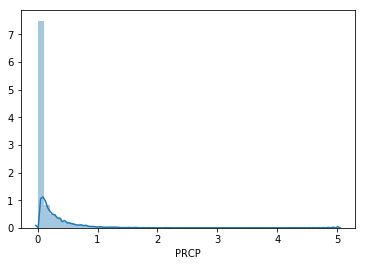

In [46]:
#Skipping date on histogram
sns.distplot(rain['PRCP'].dropna())

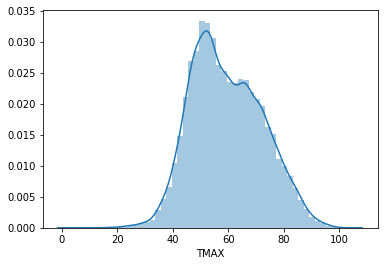

In [7]:
sns.distplot(rain['TMAX'].dropna())

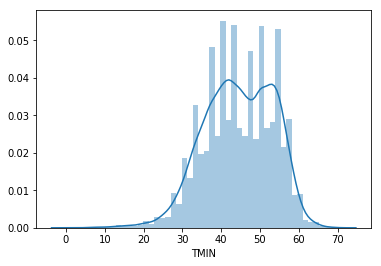

In [8]:
sns.distplot(rain['TMIN'].dropna())

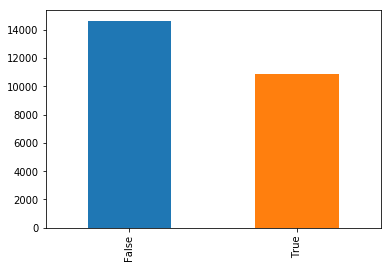

In [48]:
rain['RAIN'].value_counts().plot(kind='bar', label='Rain')

Include the other descriptive characteristics about the variables: 
* Mean
* Mode 
* Spread
* Tails

In [61]:
rain['TMIN'].mean(), rain['TMIN'].median(), rain['TMIN'].mode(), rain['TMIN'].std() 

(44.51422644906266, 45.0, 0    42
 dtype: int64, 8.892835742411922)

In [62]:
rain['DATE'].max(), rain['DATE'].min()

(Timestamp('2017-12-14 00:00:00'), Timestamp('1948-01-01 00:00:00'))

In [11]:
rain['DATE']= pd.to_datetime(rain['DATE'])

In [12]:
rain['YEAR']= rain['DATE'].dt.year

In [13]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR
0,1948-01-01,0.47,51,42,True,1948
1,1948-01-02,0.59,45,36,True,1948
2,1948-01-03,0.42,45,35,True,1948
3,1948-01-04,0.31,45,34,True,1948
4,1948-01-05,0.17,45,32,True,1948


In [133]:
first_half = rain[rain["DATE"]>='1982-12-22 00:00:00']
second_half = rain[rain["DATE"]<='1982-12-23 00:00:00']

In [134]:
#first_half['PRCP'].items

n = first_half['PRCP'].count()
pmf_first = dict(first_half['PRCP'].value_counts())
for freq, x in new_dict.items():
    pmf_first[x] = freq / n

<Container object of 183 artists>

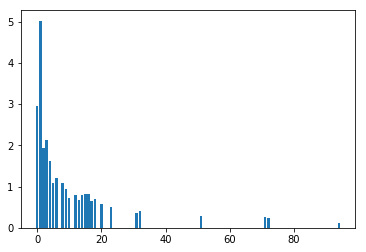

In [135]:
plt.bar(list(pmf_first.values()),list(pmf_first.keys()))

In [137]:
n = second_half['PRCP'].count()
pmf_second = dict(second_half['PRCP'].value_counts())
for freq, x in new_dict.items():
    pmf_second[x] = freq / n

<Container object of 176 artists>

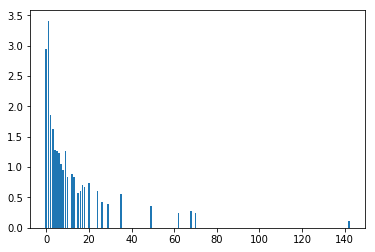

In [138]:
plt.bar(list(pmf_second.values()), list(pmf_second.keys()))

In [115]:
pmf

{0.0: 7403,
 0.01: 471,
 0.02: 354,
 0.03: 235,
 0.04: 230,
 0.05: 207,
 0.06: 199,
 0.07: 157,
 0.08: 161,
 0.09: 136,
 0.1: 132,
 0.11: 94,
 0.12: 124,
 0.13: 113,
 0.14: 112,
 0.15: 111,
 0.16: 118,
 0.17: 94,
 0.18: 90,
 0.19: 88,
 0.2: 72,
 0.21: 69,
 0.22: 71,
 0.23: 57,
 0.24: 72,
 0.25: 71,
 0.26: 68,
 0.27: 54,
 0.28: 51,
 0.29: 56,
 0.3: 51,
 0.31: 44,
 0.32: 61,
 0.33: 40,
 0.34: 52,
 0.35: 38,
 0.36: 31,
 0.37: 43,
 0.38: 45,
 0.39: 35,
 0.4: 32,
 0.41: 28,
 0.42: 31,
 0.43: 23,
 0.44: 33,
 0.45: 32,
 0.46: 30,
 0.47: 27,
 0.48: 16,
 0.49: 25,
 0.5: 29,
 0.51: 23,
 0.52: 16,
 0.53: 22,
 0.54: 23,
 0.55: 20,
 0.56: 14,
 0.57: 20,
 0.58: 17,
 0.59: 19,
 0.6: 14,
 0.61: 18,
 0.62: 15,
 0.63: 9,
 0.64: 17,
 0.65: 18,
 0.66: 10,
 0.67: 13,
 0.68: 14,
 0.69: 9,
 0.7: 18,
 0.71: 12,
 0.72: 10,
 0.73: 16,
 0.74: 12,
 0.75: 13,
 0.76: 11,
 0.77: 9,
 0.78: 7,
 0.79: 14,
 0.8: 12,
 0.81: 16,
 0.82: 15,
 0.83: 5,
 0.84: 6,
 0.85: 6,
 0.86: 6,
 0.87: 9,
 0.88: 5,
 0.89: 8,
 0.9: 4,
 0.9

In [113]:
pmf

{0.0: 7246,
 0.01: 462,
 0.02: 353,
 0.03: 258,
 0.04: 198,
 0.05: 212,
 0.06: 209,
 0.07: 170,
 0.08: 174,
 0.09: 130,
 0.1: 129,
 0.11: 142,
 0.12: 146,
 0.13: 130,
 0.14: 112,
 0.15: 108,
 0.16: 97,
 0.17: 96,
 0.18: 70,
 0.19: 63,
 0.2: 101,
 0.21: 73,
 0.22: 62,
 0.23: 77,
 0.24: 70,
 0.25: 62,
 0.26: 59,
 0.27: 51,
 0.28: 68,
 0.29: 64,
 0.3: 67,
 0.31: 54,
 0.32: 38,
 0.33: 51,
 0.34: 47,
 0.35: 53,
 0.36: 49,
 0.37: 41,
 0.38: 44,
 0.39: 42,
 0.4: 29,
 0.41: 28,
 0.42: 32,
 0.43: 26,
 0.44: 33,
 0.45: 46,
 0.46: 27,
 0.47: 30,
 0.48: 22,
 0.49: 31,
 0.5: 26,
 0.51: 24,
 0.52: 17,
 0.53: 25,
 0.54: 24,
 0.55: 19,
 0.56: 35,
 0.57: 15,
 0.58: 21,
 0.59: 13,
 0.6: 24,
 0.61: 16,
 0.62: 16,
 0.63: 13,
 0.64: 13,
 0.65: 9,
 0.66: 17,
 0.67: 18,
 0.68: 8,
 0.69: 9,
 0.7: 17,
 0.71: 15,
 0.72: 9,
 0.73: 13,
 0.74: 20,
 0.75: 7,
 0.76: 11,
 0.77: 9,
 0.78: 9,
 0.79: 13,
 0.8: 13,
 0.81: 8,
 0.82: 4,
 0.83: 13,
 0.84: 10,
 0.85: 6,
 0.86: 5,
 0.87: 8,
 0.88: 12,
 0.89: 3,
 0.9: 2,
 0.91

In [ ]:
#Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).



Text(0.5,1,'Rain Corr')

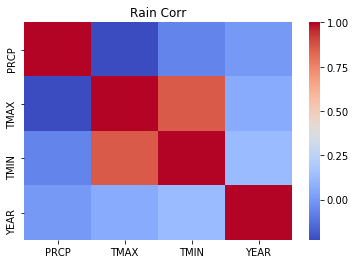

In [14]:
sns.heatmap(rain.corr(), cmap='coolwarm')
plt.title('Rain Corr')

In [15]:
rain_per_year = rain[(rain['RAIN']==True)].groupby('YEAR').count()

In [16]:
year_rain_count=rain[rain['RAIN']==True].groupby('YEAR').count()

In [17]:
rain_per_year['RAIN']=year_rain_count['RAIN']

In [18]:
rain_per_year['TMIN MEAN']=rain.groupby('YEAR')['TMIN'].mean()
rain_per_year['TMAX MEAN']=rain.groupby('YEAR')['TMAX'].mean()
rain_per_year['PRCP MEAN']=rain.groupby('YEAR')['PRCP'].mean()

In [19]:
rain_per_year.reset_index(inplace=True)

In [20]:
rain_per_year = rain_per_year[['YEAR', 'RAIN', 'TMIN MEAN', 'TMAX MEAN', 'PRCP MEAN']]

In [21]:
rain_per_year.head()

,YEAR,RAIN,TMIN MEAN,TMAX MEAN,PRCP MEAN
0,1948,177,41.196721,57.013661,0.125109
1,1949,139,41.391781,59.147945,0.088932
2,1950,194,41.000000,57.035616,0.151068
3,1951,150,41.052055,58.545205,0.110411
4,1952,139,41.467213,58.743169,0.064973


In [22]:
rain_per_year.columns

Index(['YEAR', 'RAIN', 'TMIN MEAN', 'TMAX MEAN', 'PRCP MEAN'], dtype='object')

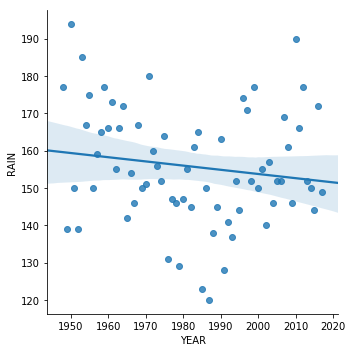

In [23]:
sns.lmplot(x='YEAR', y='RAIN', data=rain_per_year)

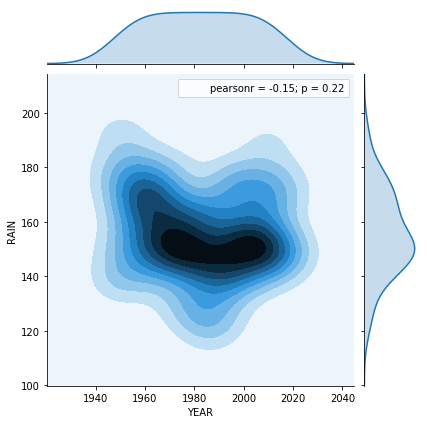

In [24]:
sns.jointplot(x='YEAR', y='RAIN', data=rain_per_year, kind='kde')

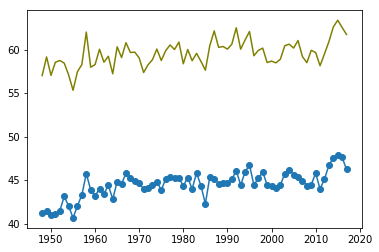

In [25]:
plt.plot('YEAR', 'TMIN MEAN', data=rain_per_year, marker='o')
plt.plot('YEAR', 'TMAX MEAN', data=rain_per_year, marker='', color='olive')

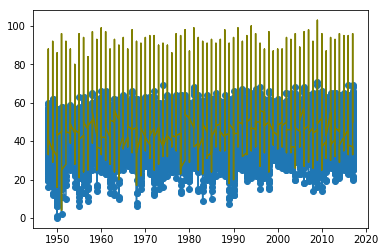

In [26]:
plt.plot('YEAR', 'TMIN', data=rain, marker='o')
plt.plot('YEAR', 'TMAX', data=rain, marker='', color='olive')

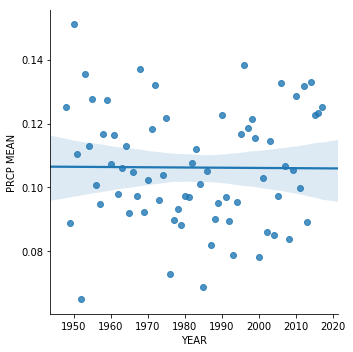

In [27]:
sns.lmplot('YEAR', 'PRCP MEAN', data=rain_per_year)

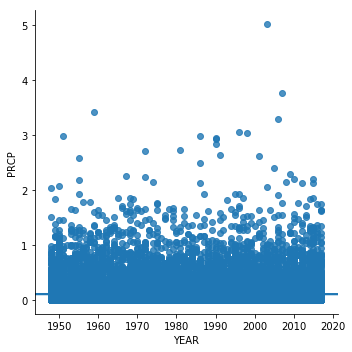

In [28]:
sns.lmplot('YEAR', 'PRCP', data=rain)

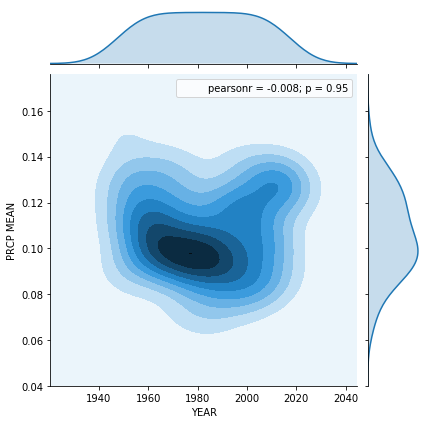

In [159]:
sns.jointplot(x='YEAR', y='PRCP MEAN', data=rain_per_year, kind='kde')

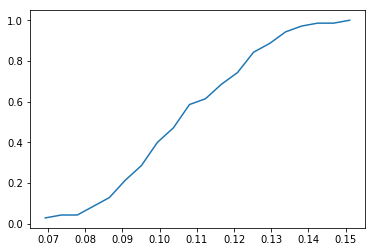

In [140]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['PRCP MEAN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

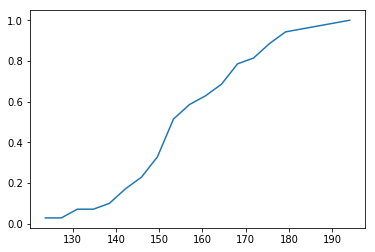

In [142]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['RAIN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

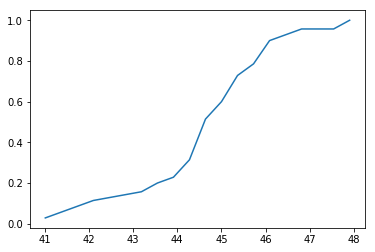

In [29]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['TMIN MEAN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

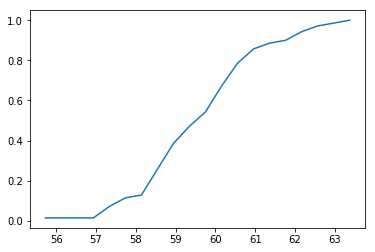

In [30]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['TMAX MEAN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

In [31]:
super_column = rain_per_year[['YEAR', 'TMIN MEAN', 'TMAX MEAN']]

In [32]:
super_column['Max']='Max'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
super_column['Min']='Min'

In [34]:
max = super_column[['YEAR', 'TMAX MEAN', 'Max']]
min = super_column[['YEAR', 'TMIN MEAN', 'Min']]

In [35]:
max['temp']=max['TMAX MEAN']
max['type']=max['Max']
min['temp']=min['TMIN MEAN']
min['type']=min['Min']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
max = max[['YEAR', 'temp', 'type']]
min = min[['YEAR', 'temp', 'type']]

In [37]:
combined = max.append(min)

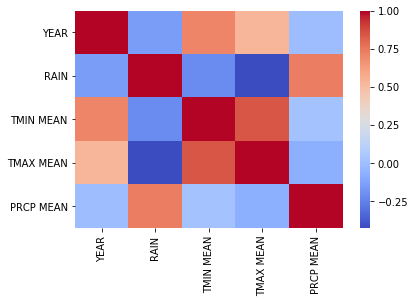

In [144]:
sns.heatmap(rain_per_year.corr(), cmap='coolwarm')

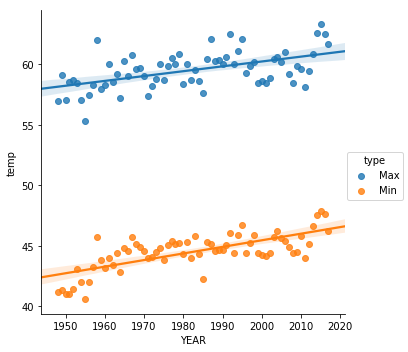

In [38]:
sns.lmplot(x='YEAR', y='temp', hue='type', data=combined)

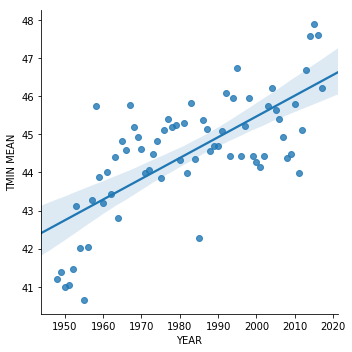

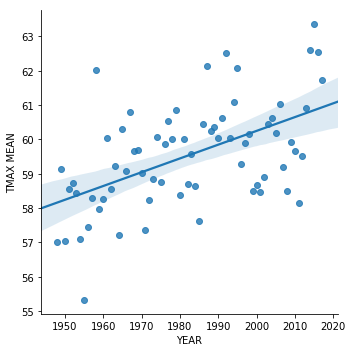

In [39]:
sns.lmplot(x='YEAR', y='TMIN MEAN', data=rain_per_year)
sns.lmplot(x='YEAR', y='TMAX MEAN', data=rain_per_year)

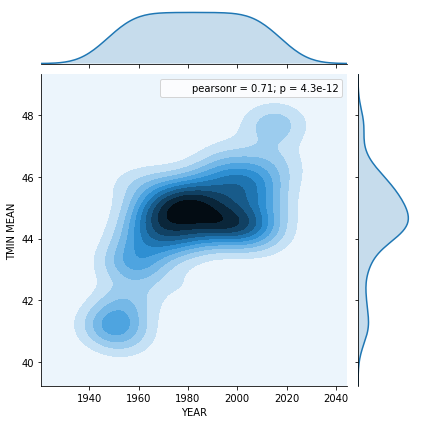

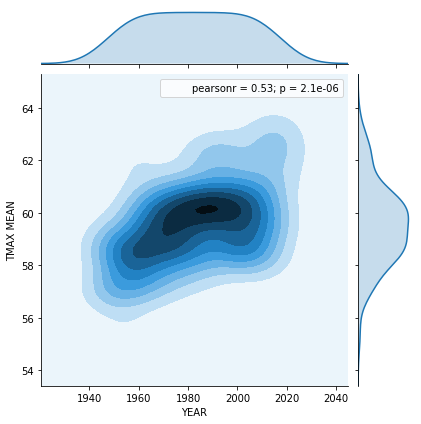

In [40]:
sns.jointplot(x='YEAR', y='TMIN MEAN', data=rain_per_year, kind='kde')
sns.jointplot(x='YEAR', y='TMAX MEAN', data=rain_per_year, kind='kde')

In [ ]:
sns.lmplot(x='YEAR', y='RAIN', data=rain_per_year)

In [152]:
import statsmodels.formula.api as sm

In [154]:

result = sm.ols(formula='RAIN ~ YEAR',data=rain_per_year).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   YEAR   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.520
Date:                Mon, 06 Aug 2018   Prob (F-statistic):              0.222
Time:                        20:46:48   Log-Likelihood:                -308.97
No. Observations:                  70   AIC:                             621.9
Df Residuals:                      68   BIC:                             626.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2012.8098     24.700     81.491      0.0

In [155]:

result = sm.ols(formula='RAIN ~ YEAR',data=rain_per_year).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RAIN   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.520
Date:                Mon, 06 Aug 2018   Prob (F-statistic):              0.222
Time:                        20:48:00   Log-Likelihood:                -289.74
No. Observations:                  70   AIC:                             583.5
Df Residuals:                      68   BIC:                             588.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.4702    180.659      2.095      0.0

In [157]:
result.pvalues

Intercept    0.039904
YEAR         0.221791
dtype: float64